# Abstract:
## Dataset: 5760-1440= 4320. Delete Nan (X1440) for CsF and None.
3024 for train, 1296 for test.7:3

Secondly, I have tried the permutation method as well as re-shuffling method.
The descriptor I used is ligand coordination number and pKa of base. As for those discrete variables, e.g. names of ligands, I used one-hot-encoding to present them.
The train data size is 3024, while size of test data is 1296. (ratio= 7:3)
***
Overall, there are 32 features.
- For re-shuffling: X axis resents the error increase if we reshuffle the feature. The greater the absolute value, the more important the feature is.


- For permutation:   First of all, negative importance in this case means that removing a given feature from the model actually improves the performance, based on R^2 score.This plot shows pKa is the most important one.
- Feature contributions. I use Treeinterpreter to get 2 rows, one row for max error, one row for least error. Error here is defined as difference between prediction and true value.

# Try to imcorporate discrete variables into LabAI

In [1]:
import pandas as pd 
import numpy as np

## load data and purge

In [2]:
df = pd.read_excel('5760_simple_discriptors.xlsx')
data = df.drop(['Reactant_1_Short_Hand','Reactant_1_eq', 'Reaction_No','Reactant_1_mmol', 'Product_Yield_Mass_Ion_Count','Reactant_2_eq','Catalyst_1_eq','Base_Short_Hand','Reagent_1_eq'], axis=1 )
data_used = data.dropna(axis=0 , how='any')

In [3]:
data_used.head()

,Reactant_1_Name,Reactant_2_Name,Catalyst_1_Short_Hand,Ligand_Short_Hand,Ligand_Dent#,Base_pKa,Solvent_1_Short_Hand,Product_Yield_PCT_Area_UV
0,6-chloroquinoline,"2a, Boronic Acid",Pd(OAc)2,P(tBu)3,1,13.8,MeCN,4.764109
1,6-chloroquinoline,"2a, Boronic Acid",Pd(OAc)2,P(Ph)3,1,13.8,MeCN,4.120962
2,6-chloroquinoline,"2a, Boronic Acid",Pd(OAc)2,AmPhos,1,13.8,MeCN,2.583837
3,6-chloroquinoline,"2a, Boronic Acid",Pd(OAc)2,P(Cy)3,1,13.8,MeCN,4.443171
4,6-chloroquinoline,"2a, Boronic Acid",Pd(OAc)2,P(o-Tol)3,1,13.8,MeCN,1.949874


In [4]:
nan_num = data_used.isnull().sum().sum()
nan_num

0

## Data_used: 4320

In [4]:
data_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 0 to 5759
Data columns (total 8 columns):
Reactant_1_Name              4320 non-null object
Reactant_2_Name              4320 non-null object
Catalyst_1_Short_Hand        4320 non-null object
Ligand_Short_Hand            4320 non-null object
Ligand_Dent#                 4320 non-null int64
Base_pKa                     4320 non-null float64
Solvent_1_Short_Hand         4320 non-null object
Product_Yield_PCT_Area_UV    4320 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 303.8+ KB


# One-hot-encoding

## Try get.dummies()

In [5]:
data_used_ohe = pd.get_dummies(data_used)
data_used_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 0 to 5759
Data columns (total 33 columns):
Ligand_Dent#                                              4320 non-null int64
Base_pKa                                                  4320 non-null float64
Product_Yield_PCT_Area_UV                                 4320 non-null float64
Reactant_1_Name_6-Bromoquinoline                          4320 non-null uint8
Reactant_1_Name_6-Iodoquinoline                           4320 non-null uint8
Reactant_1_Name_6-Quinolineboronic acid pinacol ester     4320 non-null uint8
Reactant_1_Name_6-chloroquinoline                         4320 non-null uint8
Reactant_1_Name_6-quinoline-boronic acid hydrochloride    4320 non-null uint8
Reactant_1_Name_6-triflatequinoline                       4320 non-null uint8
Reactant_1_Name_Potassium quinoline-6-trifluoroborate     4320 non-null uint8
Reactant_2_Name_2a, Boronic Acid                          4320 non-null uint8
Reactant_2_Name_2b, Boronic Est

In [6]:
data_used_ohe.head()

,Ligand_Dent#,Base_pKa,Product_Yield_PCT_Area_UV,Reactant_1_Name_6-Bromoquinoline,Reactant_1_Name_6-Iodoquinoline,Reactant_1_Name_6-Quinolineboronic acid pinacol ester,Reactant_1_Name_6-chloroquinoline,Reactant_1_Name_6-quinoline-boronic acid hydrochloride,Reactant_1_Name_6-triflatequinoline,Reactant_1_Name_Potassium quinoline-6-trifluoroborate,...,Ligand_Short_Hand_XPhos,Ligand_Short_Hand_Xantphos,Ligand_Short_Hand_dppf,Ligand_Short_Hand_dtbpf,Solvent_1_Short_Hand_DMF,Solvent_1_Short_Hand_MeCN,Solvent_1_Short_Hand_MeOH,Solvent_1_Short_Hand_MeOH/H2O_V2 9:1,Solvent_1_Short_Hand_THF,Solvent_1_Short_Hand_THF_V2
0,1,13.8,4.764109,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,13.8,4.120962,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,13.8,2.583837,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,13.8,4.443171,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,13.8,1.949874,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Build Randomforest based on this data set

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.externals.joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import validation_curve

## Shuffle data and split data to 7:3= train:test size. 

3024 for train, 1296 for test.

In [8]:
# %%time
X, y = shuffle(data_used_ohe.drop('Product_Yield_PCT_Area_UV', axis=1), data_used_ohe['Product_Yield_PCT_Area_UV'], random_state=7) 
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 2)
X.head()

,Ligand_Dent#,Base_pKa,Reactant_1_Name_6-Bromoquinoline,Reactant_1_Name_6-Iodoquinoline,Reactant_1_Name_6-Quinolineboronic acid pinacol ester,Reactant_1_Name_6-chloroquinoline,Reactant_1_Name_6-quinoline-boronic acid hydrochloride,Reactant_1_Name_6-triflatequinoline,Reactant_1_Name_Potassium quinoline-6-trifluoroborate,"Reactant_2_Name_2a, Boronic Acid",...,Ligand_Short_Hand_XPhos,Ligand_Short_Hand_Xantphos,Ligand_Short_Hand_dppf,Ligand_Short_Hand_dtbpf,Solvent_1_Short_Hand_DMF,Solvent_1_Short_Hand_MeCN,Solvent_1_Short_Hand_MeOH,Solvent_1_Short_Hand_MeOH/H2O_V2 9:1,Solvent_1_Short_Hand_THF,Solvent_1_Short_Hand_THF_V2
884,1,10.33,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
1696,1,17.00,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2291,0,10.75,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4264,1,17.00,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
928,1,17.00,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [9]:
print(X_train.columns)
print(X_train.shape)

Index(['Ligand_Dent#', 'Base_pKa', 'Reactant_1_Name_6-Bromoquinoline',
       'Reactant_1_Name_6-Iodoquinoline',
       'Reactant_1_Name_6-Quinolineboronic acid pinacol ester',
       'Reactant_1_Name_6-chloroquinoline',
       'Reactant_1_Name_6-quinoline-boronic acid hydrochloride',
       'Reactant_1_Name_6-triflatequinoline',
       'Reactant_1_Name_Potassium quinoline-6-trifluoroborate',
       'Reactant_2_Name_2a, Boronic Acid', 'Reactant_2_Name_2b, Boronic Ester',
       'Reactant_2_Name_2c, Trifluoroborate', 'Reactant_2_Name_2d, Bromide',
       'Catalyst_1_Short_Hand_Pd(OAc)2', 'Ligand_Short_Hand_AmPhos',
       'Ligand_Short_Hand_CataCXium A', 'Ligand_Short_Hand_None',
       'Ligand_Short_Hand_P(Cy)3', 'Ligand_Short_Hand_P(Ph)3 ',
       'Ligand_Short_Hand_P(o-Tol)3', 'Ligand_Short_Hand_P(tBu)3',
       'Ligand_Short_Hand_SPhos', 'Ligand_Short_Hand_XPhos',
       'Ligand_Short_Hand_Xantphos', 'Ligand_Short_Hand_dppf',
       'Ligand_Short_Hand_dtbpf', 'Solvent_1_Short_Hand_D

In [10]:
X_test.shape

(1296, 32)

## GridSearch for Best Parameters
an accurrate one 
It ran for 12hrs and showed no sign of finishing. Artificially stop.

In [44]:
# %%time
# #General stuff
# seed = 1234
# kfold = KFold(n_splits = 10, random_state = seed)
# scoring = 'neg_mean_absolute_error'
# model = RandomForestRegressor(random_state=seed)

# #Parameters to tune
# estimators = np.arange(1000, 10500, 50, dtype='int')
# estimators_int = np.ndarray.tolist(estimators)
# max_depth = np.linspace(2, 100, 15, dtype='int') #从1-10的10个数
# max_depth_lst = np.ndarray.tolist(max_depth)
# max_depth_lst.append(None)

# param_grid = {'n_estimators':estimators_int,
#                 'max_features':('auto', 'sqrt'),
#                 'max_depth':max_depth_lst
#                 }

# #search best parameters and train
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=6)
# grid_result = grid.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: 

### Best parameters

In [66]:
# #print the best data cranked out from the grid search
# best_params = pd.DataFrame([grid.best_params_], columns=grid.best_params_.keys())
# print('Best parameters:',best_params)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

### Put in the best parameters and predict

In [ ]:
# import sklearn.metrics as sm
# model2 = grid.best_estimator_
# RF_fit = model2.fit(X_train, y_train)
# X_test_pred = model2.predict(X_test)

# Skirt the GridSearch and Build a model

In [156]:
%%time
import sklearn.metrics as sm
# model2 = grid.best_estimator_
model2 = RandomForestRegressor(n_estimators= 3000, max_depth= 17, max_features= 'auto',n_jobs=6 )
RF_fit = model2.fit(X_train, y_train)
X_test_pred = model2.predict(X_test)
X_train_pred = model2.predict(X_train )

Wall time: 35.3 s


In [157]:
df_sca_train = pd.DataFrame(y_train)
df_sca_train['X_train_pred'] = X_train_pred
df_sca_train.head()

,Product_Yield_PCT_Area_UV,X_train_pred
2925,24.711254,23.838698
2406,87.236013,81.125850
2481,13.889930,15.464527
484,70.181122,64.974774
1546,14.533792,16.222807


In [158]:
df_sca = pd.DataFrame(y_test)
df_sca['X_test_pred'] = X_test_pred
df_sca.head()

,Product_Yield_PCT_Area_UV,X_test_pred
5617,79.121781,63.183470
165,26.826789,26.026789
2247,88.044932,87.130892
3231,19.089124,21.491780
254,4.120970,4.478831


### Plot

<Figure size 1440x1440 with 0 Axes>

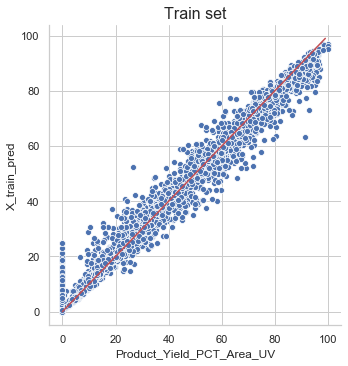

In [159]:
plt.figure(figsize=(20,20))
sns.relplot(x='Product_Yield_PCT_Area_UV', y='X_train_pred', data=df_sca_train)
plt.title('Train set', fontsize = 16)
plt.plot(range(100),range(100), c='r')
plt.show()

<Figure size 1440x1440 with 0 Axes>

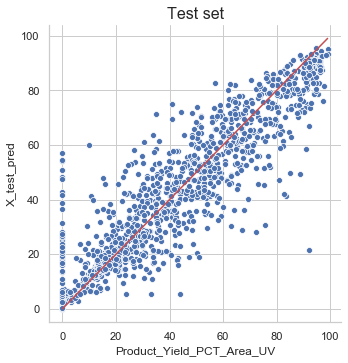

In [160]:
plt.figure(figsize=(20,20))
sns.relplot(x='Product_Yield_PCT_Area_UV', y='X_test_pred', data=df_sca)
plt.title('Test set', fontsize = 16)
plt.plot(range(100),range(100), c='r')
plt.show()

### Feature importance by Sklearn(default)

In [161]:
feat_imp = pd.DataFrame(model2.feature_importances_, 
                        index=X_train.columns, 
                        columns=['Feature_importances'])
# feat_imp
feat_imp = feat_imp.sort_values(by=['Feature_importances'], ascending = False)
print(feat_imp)#特征重要性表格，按重要性排序

                                                    Feature_importances
Reactant_2_Name_2c, Trifluoroborate                            0.166256
Reactant_1_Name_6-Iodoquinoline                                0.141214
Base_pKa                                                       0.077599
Solvent_1_Short_Hand_MeOH                                      0.071039
Reactant_1_Name_6-chloroquinoline                              0.069031
Ligand_Dent#                                                   0.068567
Reactant_2_Name_2d, Bromide                                    0.045678
Ligand_Short_Hand_Xantphos                                     0.045262
Ligand_Short_Hand_XPhos                                        0.028941
Solvent_1_Short_Hand_DMF                                       0.028027
Solvent_1_Short_Hand_THF                                       0.025630
Ligand_Short_Hand_SPhos                                        0.022817
Ligand_Short_Hand_P(Ph)3                                       0

### Score

In [162]:
print( "Mean absolute error =", round(sm.mean_absolute_error(y_test, X_test_pred), 2) )
print( "Mean squared error =", round(sm.mean_squared_error(y_test, X_test_pred), 2) )
print ("Median absolute error =", round(sm.median_absolute_error(y_test, X_test_pred), 2)) 
print ("Explained variance score =", round(sm.explained_variance_score(y_test, X_test_pred), 2)) 
print ("R2 score =", round(sm.r2_score(y_test, X_test_pred), 2) )

Mean absolute error = 7.66
Mean squared error = 131.81
Median absolute error = 4.59
Explained variance score = 0.83
R2 score = 0.83


### use cross_val_score to get a more accurate and reliable score

In [164]:
scoring = ['explained_variance','max_error','neg_mean_absolute_error', 'neg_mean_squared_error','r2']
scores_df = pd.DataFrame()
for i in scoring:
    score = cross_val_score(model2, X, y, scoring=i, cv= 5, n_jobs= 6)
    scores_df[i] = score
    print(i, '\n', score)
scores_df['neg_mean_absolute_error']=scores_df['neg_mean_absolute_error']*(-1)
scores_df['neg_mean_squared_error']=np.sqrt(-1*scores_df['neg_mean_squared_error'])
scores_df.columns = ['explained_variance', 'max_error', 'MAE', 'RMSE','r2']
scores_df

explained_variance 
 [0.84674132 0.86000623 0.86406895 0.84245578 0.84424898]
max_error 
 [-45.00874873 -45.70790211 -56.96513938 -70.53627456 -62.16155252]
neg_mean_absolute_error 
 [-7.58964344 -7.27666344 -6.98897972 -7.68989536 -7.53625826]
neg_mean_squared_error 
 [-121.32374206 -114.95447159 -108.97358077 -132.58815399 -131.57942879]
r2 
 [0.84494529 0.85950841 0.86437884 0.8417507  0.84454766]


,explained_variance,max_error,MAE,RMSE,r2
0,0.846741,-45.008749,7.589643,11.014706,0.844945
1,0.860006,-45.707902,7.276663,10.721682,0.859508
2,0.864069,-56.965139,6.988980,10.439041,0.864379
3,0.842456,-70.536275,7.689895,11.514693,0.841751
4,0.844249,-62.161553,7.536258,11.470808,0.844548


In [166]:
scores_df.mean()

explained_variance     0.851504
max_error            -56.075923
MAE                    7.416288
RMSE                  11.032186
r2                     0.851026
dtype: float64

### Plot

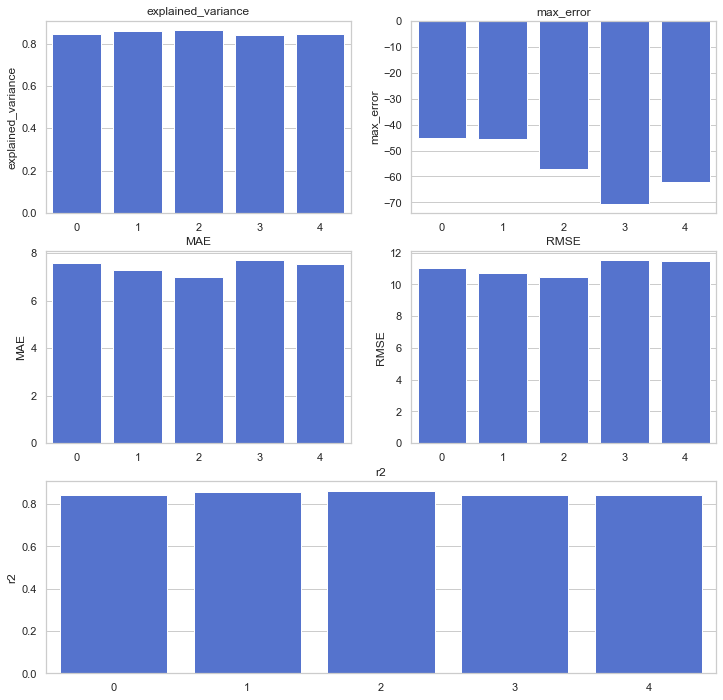

In [165]:
plt.figure(figsize= (12, 12))
plt.subplot(321)
sns.barplot(x= scores_df.index, y ='explained_variance',data= scores_df, orient = 'v', color = 'royalblue')
plt.ylabel('explained_variance')
plt.title('explained_variance')
plt.subplot(322)
sns.barplot(x= scores_df.index, y ='max_error',data= scores_df, orient = 'v', color = 'royalblue')
plt.ylabel('max_error')
plt.title('max_error')
plt.subplot(323)
sns.barplot(x= scores_df.index, y ='MAE',data= scores_df, orient = 'v', color = 'royalblue')
plt.ylabel('MAE')
plt.title('MAE')
plt.subplot(324)
sns.barplot(x= scores_df.index, y ='RMSE',data= scores_df, orient = 'v', color = 'royalblue')
plt.ylabel('RMSE')
plt.title('RMSE')
plt.subplot(313)
sns.barplot(x= scores_df.index, y ='r2',data= scores_df, orient = 'v', color = 'royalblue')
plt.ylabel('r2')
plt.title('r2')
plt.show()

In [11]:
# n_estimators = 5000, max_depth = 10
print( "Mean absolute error =", round(sm.mean_absolute_error(y_test, X_test_pred), 2) )
print( "Mean squared error =", round(sm.mean_squared_error(y_test, X_test_pred), 2) )
print ("Median absolute error =", round(sm.median_absolute_error(y_test, X_test_pred), 2)) 
print ("Explained variance score =", round(sm.explained_variance_score(y_test, X_test_pred), 2)) 
print ("R2 score =", round(sm.r2_score(y_test, X_test_pred), 2) )

Mean absolute error = 9.16
Mean squared error = 174.91
Median absolute error = 5.65
Explained variance score = 0.78
R2 score = 0.78


In [25]:
y.describe()

count    4320.000000
mean       41.290567
std        28.615804
min         0.000000
25%        16.484988
50%        35.110921
75%        65.502116
max       100.000000
Name: Product_Yield_PCT_Area_UV, dtype: float64

## Cross Validation to see the impace of each parameters

#### Cross validation for parameter: n_estimators

In [62]:
########################
# Validation curves
from sklearn.model_selection import validation_curve
model2 = RandomForestRegressor( max_depth= 10, max_features= 'auto', random_state= 1234)
parameter_grid = np.linspace(100, 5000, 8).astype(int)
train_scores, validation_scores = validation_curve(model2, X, y,"n_estimators", parameter_grid, cv=5, n_jobs=6)
print ("\n##### VALIDATION CURVES #####")
print ("\nParam: n_estimators\nTraining scores:\n", train_scores)
print ("\nParam: n_estimators\nValidation scores:\n", validation_scores)


##### VALIDATION CURVES #####

Param: n_estimators
Training scores:
 [[0.86387964 0.85659421 0.85477192 0.85861944 0.86014793]
 [0.86381831 0.85795391 0.85546838 0.85870729 0.85973877]
 [0.86374508 0.85838969 0.85529932 0.85897375 0.8597724 ]
 [0.86351157 0.85829914 0.85523294 0.85887296 0.85997615]
 [0.8635006  0.85832581 0.85534348 0.85907338 0.86017502]
 [0.86363722 0.85828047 0.85525791 0.85894273 0.86023886]
 [0.86360572 0.85821778 0.85521604 0.85894626 0.86032113]
 [0.86363165 0.85817234 0.85514218 0.85885622 0.86037155]]

Param: n_estimators
Validation scores:
 [[0.7820673  0.80383231 0.81022558 0.7870651  0.79791805]
 [0.78076447 0.80259078 0.8105888  0.7853407  0.79860946]
 [0.78063681 0.80289529 0.81042442 0.78568697 0.79819955]
 [0.78069972 0.80301029 0.81066854 0.78567323 0.79824824]
 [0.78038568 0.80311292 0.81076031 0.78590716 0.7982824 ]
 [0.78031373 0.80307105 0.81066124 0.7858792  0.79828013]
 [0.78027105 0.80303859 0.8105924  0.78581734 0.79824827]
 [0.78031549 0.802

#### Plot

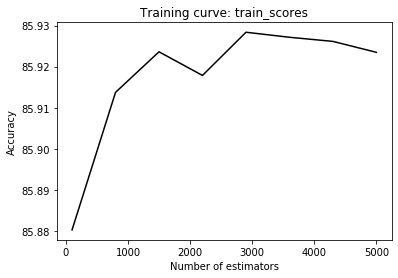

In [63]:
import matplotlib.pyplot as plt
# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Training curve: train_scores')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

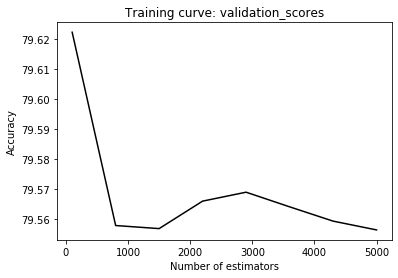

In [64]:
# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(validation_scores, axis=1), color='black')
plt.title('Training curve: validation_scores')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

#### Cross validation for parameter: max_depth

In [151]:

model2 = RandomForestRegressor( n_estimators=3000, max_features= 'auto', random_state= 1234)
parameter_grid = np.linspace(1, 20, 10).astype(int)
train_scores, valid_scores = validation_curve(model2, X, y, 
        "max_depth", parameter_grid, cv=5, n_jobs=6)
print ("\nParam: max_depth\nTraining scores:\n", train_scores)
print ("\nParam: max_depth\nValidation scores:\n", valid_scores)


Param: max_depth
Training scores:
 [[0.1484823  0.14625151 0.15120764 0.17846974 0.18147124]
 [0.47841684 0.46783442 0.46996217 0.49284955 0.48821695]
 [0.63933756 0.6249641  0.62331749 0.64122136 0.63539324]
 [0.75739816 0.74860028 0.7480093  0.75081913 0.7476727 ]
 [0.83329616 0.82577168 0.8239203  0.82754388 0.82646946]
 [0.88989521 0.88706821 0.88337969 0.88698092 0.88976933]
 [0.9331077  0.93434614 0.93129799 0.93207724 0.9376416 ]
 [0.96072281 0.96254921 0.9620283  0.96110616 0.96473158]
 [0.9737851  0.97447092 0.97471156 0.97449304 0.97563412]
 [0.97915682 0.97902586 0.97931278 0.97978416 0.97971068]]


NameError: name 'validation_scores' is not defined

In [152]:
print ("\nParam: max_depth\nValidation scores:\n", valid_scores)


Param: max_depth
Validation scores:
 [[0.11964866 0.13083562 0.13301498 0.17836106 0.19442608]
 [0.45799427 0.46270294 0.47775479 0.45652295 0.49648112]
 [0.60155629 0.62841382 0.6490815  0.59553568 0.64009049]
 [0.7037829  0.72766606 0.74405513 0.71598801 0.7361555 ]
 [0.76084538 0.782966   0.79214578 0.7709359  0.78347783]
 [0.79673118 0.81761354 0.82503518 0.79791886 0.80969124]
 [0.82074258 0.84298073 0.84655225 0.81906781 0.82858939]
 [0.83746689 0.85649723 0.85974054 0.83479255 0.83930055]
 [0.84518402 0.85969158 0.8642159  0.84224146 0.84399712]
 [0.84752148 0.86031384 0.86514953 0.84465335 0.84585591]]


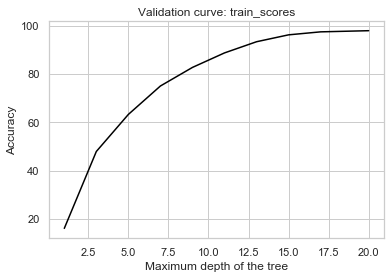

In [153]:

# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Validation curve: train_scores')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.show()


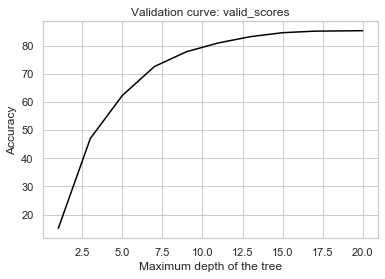

In [154]:

# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(valid_scores, axis=1), color='black')
plt.title('Validation curve: valid_scores')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.show()


#### Cross validation for parameter: max_features

In [94]:
model2 = RandomForestRegressor(n_estimators=3000, max_depth=20, random_state= 1234)
parameter_grid = ['auto', None, 'log2']
train_scores, valid_scores = validation_curve(model2, X, y, "max_features", parameter_grid, cv=5, n_jobs=6)
print ("\nParam: max_features\nTraining scores:\n", train_scores)
print ("\nParam: max_features\nValidation scores:\n", valid_scores)


Param: max_features
Training scores:
 [[0.97915682 0.97902586 0.97931278 0.97978416 0.97971068]
 [0.97915682 0.97902586 0.97931278 0.97978416 0.97971068]
 [0.97580366 0.97500216 0.9758163  0.97545088 0.97546925]]


NameError: name 'validation_scores' is not defined

In [95]:
print ("\nParam: max_features\nValidation scores:\n", valid_scores)


Param: max_features
Validation scores:
 [[0.84752148 0.86031384 0.86514953 0.84465335 0.84585591]
 [0.84752148 0.86031384 0.86514953 0.84465335 0.84585591]
 [0.83663574 0.84296043 0.84559517 0.83879319 0.83594998]]


In [108]:
max_feature_train_df = pd.DataFrame(columns=['auto','None', 'log2'])
max_feature_train_df['auto']= train_scores[0]
max_feature_train_df['None']= train_scores[1]
max_feature_train_df['log2']= train_scores[2]
max_feature_train_df

,auto,None,log2
0,0.979157,0.979157,0.975804
1,0.979026,0.979026,0.975002
2,0.979313,0.979313,0.975816
3,0.979784,0.979784,0.975451
4,0.979711,0.979711,0.975469


In [109]:
max_feature_valid_df = pd.DataFrame(columns=['auto','None', 'log2'])
max_feature_valid_df['auto']= valid_scores[0]
max_feature_valid_df['None']= valid_scores[1]
max_feature_valid_df['log2']= valid_scores[2]
max_feature_valid_df

,auto,None,log2
0,0.847521,0.847521,0.836636
1,0.860314,0.860314,0.842960
2,0.865150,0.865150,0.845595
3,0.844653,0.844653,0.838793
4,0.845856,0.845856,0.835950


In [138]:
max_feature_valid_df.mean()

auto    0.852699
None    0.852699
log2    0.839987
dtype: float64

In [136]:
plot_df= pd.DataFrame(max_feature_train_df.mean(), columns=['score'])
plot_df['type'] = max_feature_train_df.mean().index
plot_df

,score,type
auto,0.979398,auto
None,0.979398,None
log2,0.975508,log2


Text(0.5, 1.0, 'Max_feature_train')

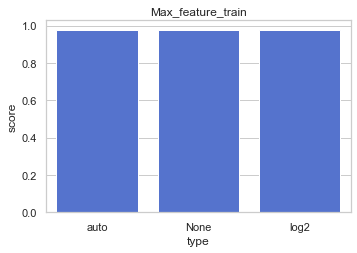

In [185]:
plt.figure(figsize= (12, 12))
plt.subplot(321)
sns.barplot(x= 'type',y='score', data= plot_df, orient = 'v', color = 'royalblue')
plt.ylabel('score')
plt.title('Max_feature_train')

# Learning curve: Impact of traindata size to model performance

In [71]:

########################
# Learning curves

from sklearn.model_selection import learning_curve

model2 = RandomForestRegressor( n_estimators=3000, max_depth= 20, max_features= 'auto', random_state= 1234)

parameter_grid = np.array([200, 500, 800, 1100, 2000, 3000])
train_sizes, train_scores, validation_scores = learning_curve(model2, 
        X, y, train_sizes=parameter_grid, cv=5, n_jobs=6)
print ("\n##### LEARNING CURVES #####")
print ("\nParam: n_estimators\nTraining scores:\n", train_scores)
print ("\nParam: n_estimators\nValidation scores:\n", validation_scores)


##### LEARNING CURVES #####

Param: n_estimators
Training scores:
 [[0.95251672 0.95403178 0.95403178 0.95403178 0.95403178]
 [0.9605772  0.9567939  0.9567939  0.9567939  0.9567939 ]
 [0.96605251 0.9648134  0.9648134  0.9648134  0.9648134 ]
 [0.97070537 0.97009797 0.96873761 0.96873761 0.96873761]
 [0.97559021 0.97574712 0.97500685 0.97541198 0.97541198]
 [0.97809064 0.97815449 0.97802132 0.97832785 0.97858251]]

Param: n_estimators
Validation scores:
 [[0.57103654 0.64837756 0.61978967 0.57177676 0.57721427]
 [0.70565243 0.73465261 0.73640174 0.70465736 0.70215509]
 [0.74578095 0.76148551 0.77139671 0.75545496 0.74840767]
 [0.76188716 0.78362323 0.79586823 0.78454159 0.7662276 ]
 [0.81485286 0.82121333 0.84307455 0.82506732 0.81045735]
 [0.84035652 0.84715162 0.86173621 0.84003866 0.84028344]]


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0, flags=flags)


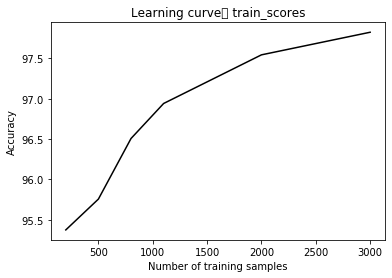

In [72]:

# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Learning curve： train_scores')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0, flags=flags)


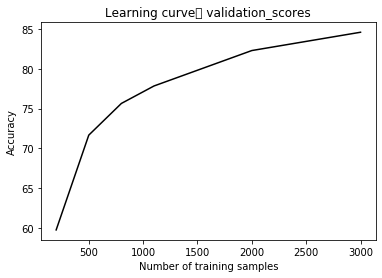

In [73]:

# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(validation_scores, axis=1), color='black')
plt.title('Learning curve： validation_scores')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()

## Plot correlation matrix

Text(0.5, 1, 'Correlation matrix')

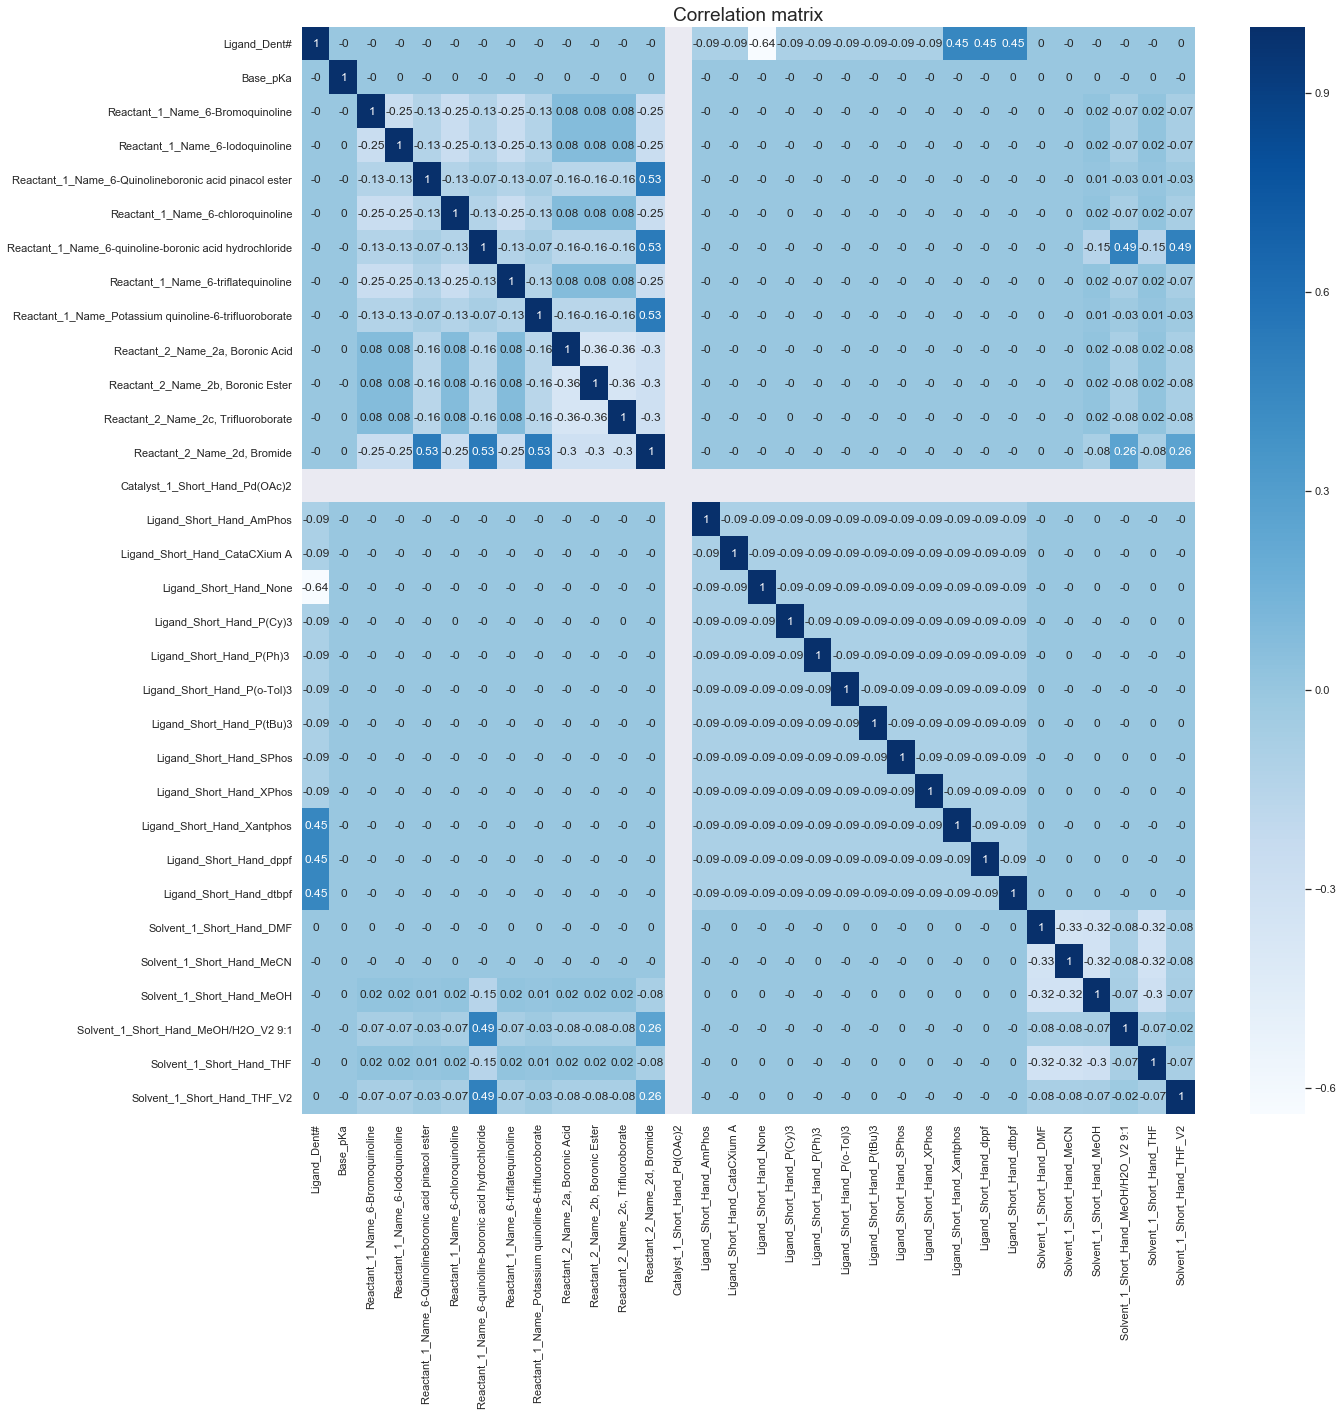

In [79]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(20, 20)})
sns.heatmap(X.corr().round(2), cmap = 'Blues', annot = True).set_title('Correlation matrix', fontsize = 19)

# Shuffle i$th$ columns to know feature importance

In [167]:
# defining rmse as scoring criteria (any other criteria can be used in a similar manner)

def score(x1,x2):
    return metrics.mean_squared_error(x1,x2)
# defining feature importance function based on above logic
def feat_imp(m, x, y, small_good = True):
    
# """
# m: random forest model
# x: matrix of independent variables
# y: output variable
# small__good: True if smaller prediction score is better
# """
    score_list = {} 
    score_list['original'] = score(m.predict(x.values), y) 
    imp = {} 
    for i in range(len(x.columns)): 
        rand_idx = np.random.permutation(len(x)) # randomization
        new_coli = x.values[rand_idx, i] 
        new_x = x.copy()            
        new_x[x.columns[i]] = new_coli 
        score_list[x.columns[i]] = score(m.predict(new_x.values), y) 
        imp[x.columns[i]] = score_list['original']-score_list[x.columns[i]] # comparison with benchmark
    if small_good:
        return sorted(imp.items(), key=lambda x: x[1]) 
    else: return sorted(imp.items(), key=lambda x: x[1], reverse=True)

In [168]:
from sklearn import metrics
importance = feat_imp(model2, X_train, y_train)
importance

[('Reactant_2_Name_2c, Trifluoroborate', -492.77178490040706),
 ('Reactant_1_Name_6-Iodoquinoline', -362.01166511995496),
 ('Reactant_1_Name_6-chloroquinoline', -346.9148723156235),
 ('Ligand_Dent#', -155.940201649117),
 ('Solvent_1_Short_Hand_MeOH', -148.69607063859925),
 ('Reactant_2_Name_2d, Bromide', -137.32364751664338),
 ('Base_pKa', -135.6122922290114),
 ('Solvent_1_Short_Hand_DMF', -96.99679775334425),
 ('Solvent_1_Short_Hand_THF', -71.40210963862636),
 ('Ligand_Short_Hand_Xantphos', -69.2007220937196),
 ('Ligand_Short_Hand_XPhos', -63.83737589912889),
 ('Ligand_Short_Hand_SPhos', -53.149769858763804),
 ('Ligand_Short_Hand_P(Ph)3 ', -35.619760997687905),
 ('Ligand_Short_Hand_P(o-Tol)3', -31.35952016585172),
 ('Reactant_1_Name_6-triflatequinoline', -30.75397434777458),
 ('Solvent_1_Short_Hand_MeCN', -27.851374736617892),
 ('Ligand_Short_Hand_P(tBu)3', -25.057984686415175),
 ('Ligand_Short_Hand_None', -23.865836191607457),
 ('Reactant_2_Name_2a, Boronic Acid', -22.555735910653155

### Shuffle the value of *'Reactant_2_Name_2c, Trifluoroborate'* will increase RMSE the most. Thus it is the most important feature.

### correlation heatmap

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


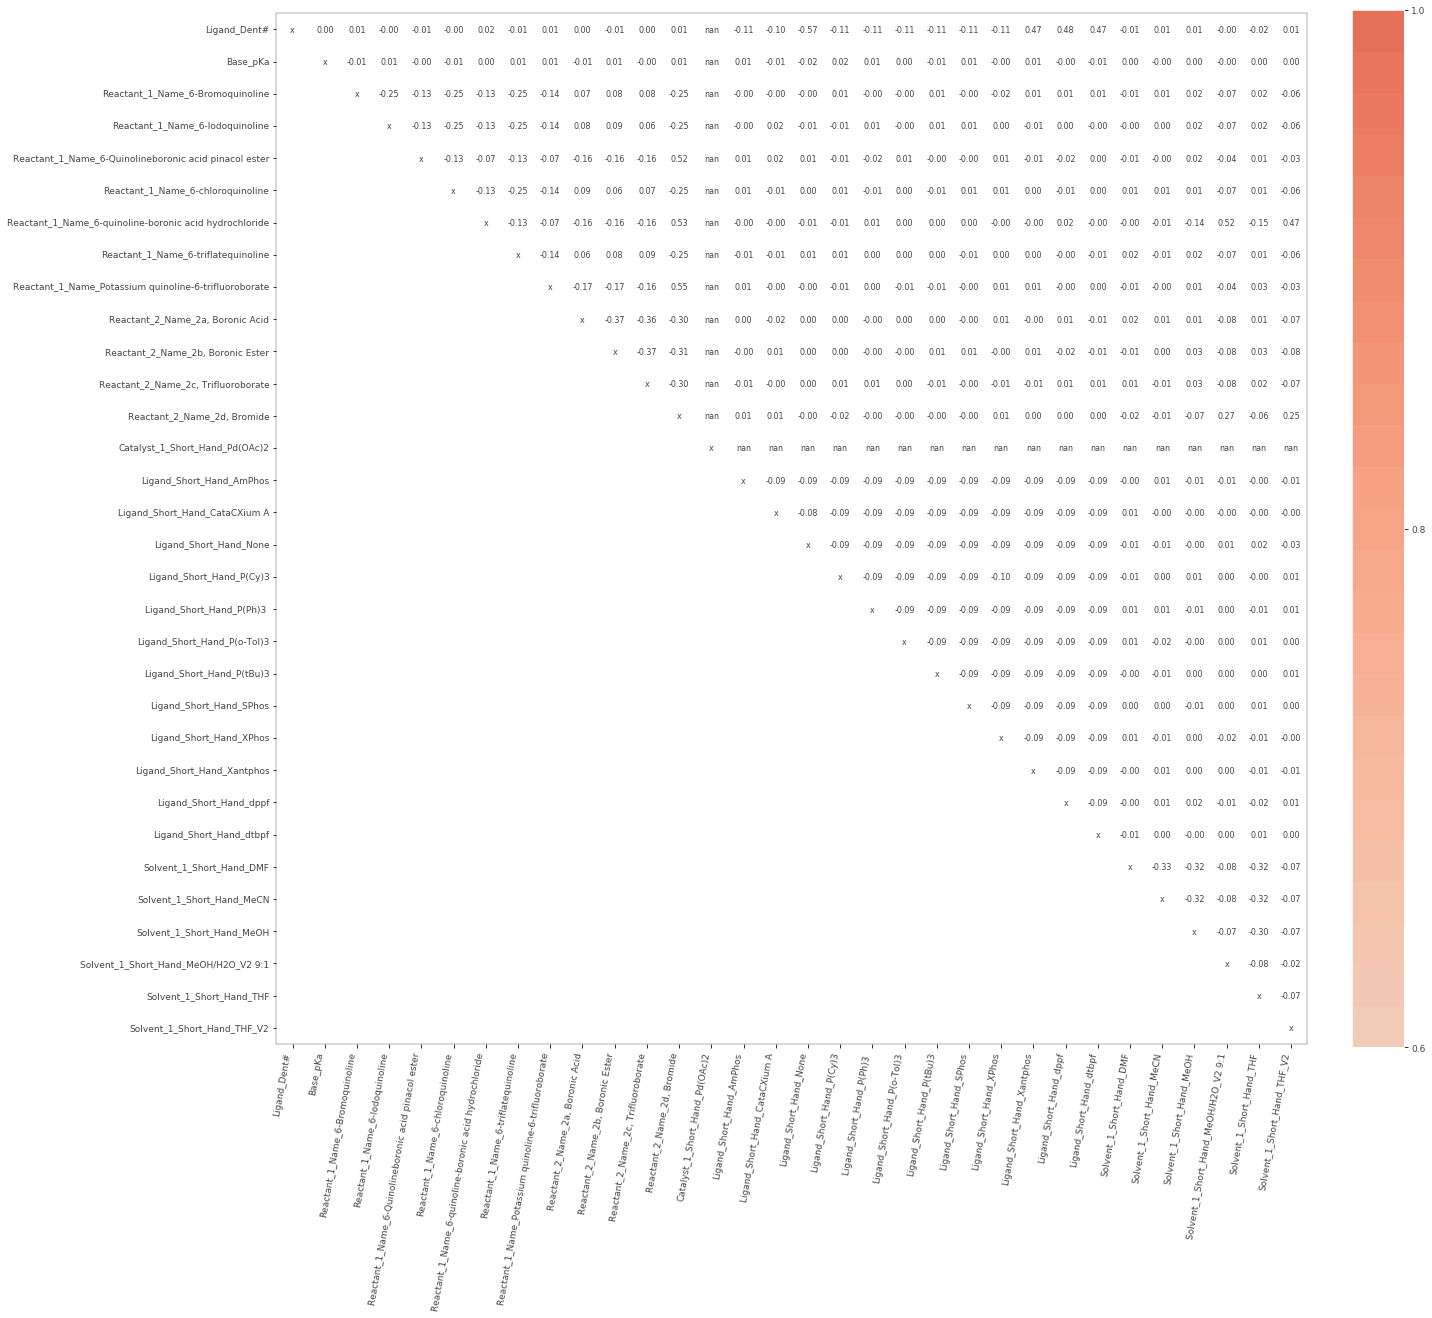

In [11]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(20,20))
viz.view()

## Permutation feature importance

In [169]:
from sklearn.metrics import mean_squared_error
from rfpimp import permutation_importances

def mse(rf, X_train, y_train):
    return mean_squared_error(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(model2, X_train, y_train, mse)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)

In [170]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)
  

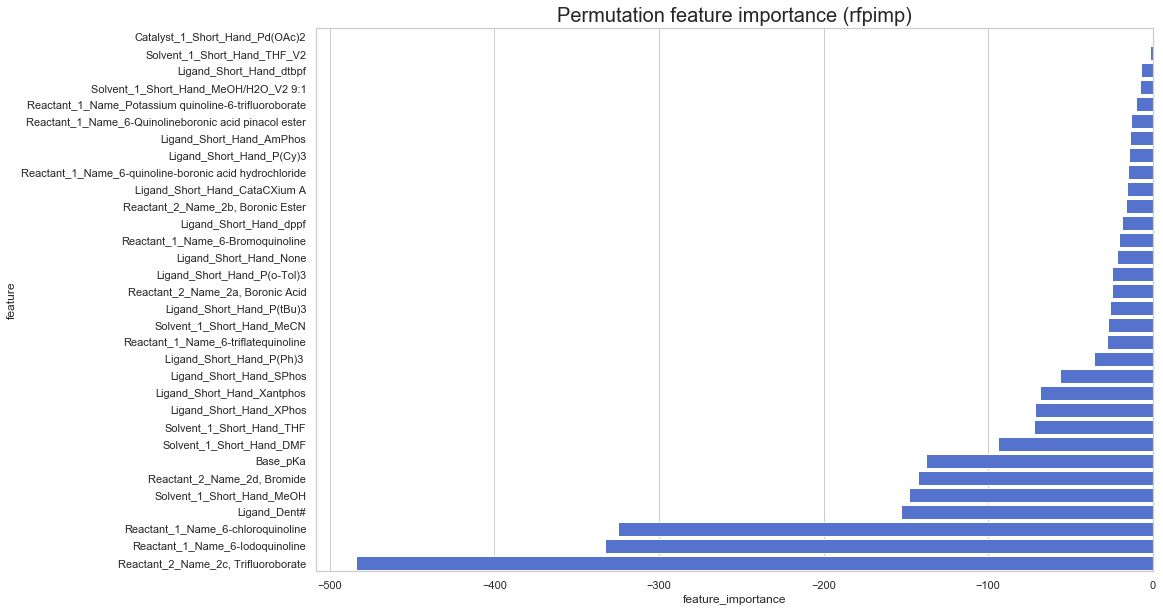

In [171]:
import seaborn as sns
plt.figure(figsize=(15, 10))
var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')
plt.show()

## Drop feature importance

In [172]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train) #benckmark是r^2分
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

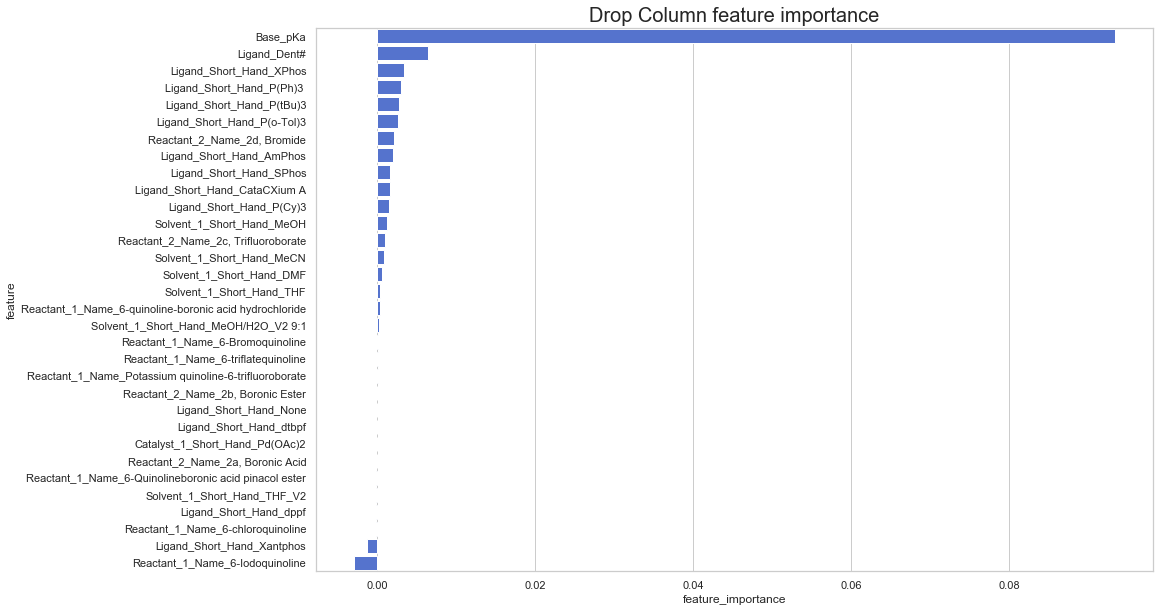

In [173]:
drop_imp = drop_col_feat_imp(model2, X_train, y_train)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
var_imp_plot(drop_imp, 'Drop Column feature importance')
plt.show() 

# Treeinterpreter

The main idea of `treeinterpreter` is that it uses the underlying trees in Random Forest to **explain how each feature contributes the end value.** We can observe how the value of the prediction (defined as the sum of each feature contributions + average given by the initial node that is based on the entire training set) changes along the prediction path within the decision tree (after every split), together with the information which feature caused the split (so also the change in prediction).

The formula for the prediction function ($f(x)$) can be written down as:
$$ f(x) = c_{full} +\sum_{k=1}^{K}contribution(x, k)$$

where $c_{full}$ is the average of the entire dataset (initial node), $K$ is the total number of features.

This may sound complicated, but take a look at an example from the author of the library:

In [178]:
y_train.describe()

count    3024.000000
mean       41.495436
std        28.805431
min         0.000000
25%        16.500656
50%        35.134937
75%        66.514393
max       100.000000
Name: Product_Yield_PCT_Area_UV, dtype: float64

In [176]:
pred_diff = pd.DataFrame({'difference': abs(y_train - model2.predict(X_train))})
min_error = pred_diff.sort_values('difference').head(1).index.values[0]
print('Index with smallest error:', min_error)
max_error = pred_diff.sort_values('difference', ascending = False).head(1).index.values[0]
print('Index with largest error:', max_error)

Index with smallest error: 5146
Index with largest error: 5324


In [186]:
from treeinterpreter import treeinterpreter as ti

selected_rows = [914, 2996]
selected_df = X_train.iloc[selected_rows,:].values
prediction, bias, contributions = ti.predict(model2, selected_df)

In [187]:
prediction

array([78.302461  , 31.37955026])

In [188]:
for i in range(len(selected_rows)):
    print("Row", selected_rows[i])
    print("Prediction:", prediction[i], 'Actual Value:', y_train[selected_rows[i]])
    print("Bias (trainset mean)", bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], 
                                 X_train.columns), 
                             key=lambda x: -abs(x[0])):
        print(feature, round(c, 2))
    print("-"*20) 

Row 914
Prediction: 78.30246099580243 Actual Value: 11.464075044506
Bias (trainset mean) 41.5033250660941
Feature contributions:
Reactant_2_Name_2d, Bromide 8.2
Base_pKa 7.49
Ligand_Dent# 6.47
Reactant_1_Name_6-Iodoquinoline -5.44
Reactant_2_Name_2c, Trifluoroborate 5.21
Reactant_1_Name_6-chloroquinoline 5.16
Solvent_1_Short_Hand_THF -4.74
Solvent_1_Short_Hand_DMF 4.48
Reactant_2_Name_2a, Boronic Acid 3.42
Reactant_2_Name_2b, Boronic Ester 3.26
Ligand_Short_Hand_P(o-Tol)3 2.3
Ligand_Short_Hand_P(Ph)3  -2.04
Ligand_Short_Hand_None 2.03
Ligand_Short_Hand_P(tBu)3 1.66
Solvent_1_Short_Hand_MeCN -1.49
Ligand_Short_Hand_XPhos 1.41
Ligand_Short_Hand_Xantphos 1.02
Ligand_Short_Hand_AmPhos 0.61
Reactant_1_Name_6-Bromoquinoline -0.48
Solvent_1_Short_Hand_MeOH -0.48
Ligand_Short_Hand_CataCXium A -0.46
Ligand_Short_Hand_P(Cy)3 -0.4
Reactant_1_Name_6-triflatequinoline -0.35
Ligand_Short_Hand_SPhos -0.11
Ligand_Short_Hand_dppf 0.05
Ligand_Short_Hand_dtbpf 0.01
Reactant_1_Name_6-Quinolineboronic acid

In [189]:
contributions1 = pd.DataFrame(contributions, columns=X_train.columns)
contributions1

,Ligand_Dent#,Base_pKa,Reactant_1_Name_6-Bromoquinoline,Reactant_1_Name_6-Iodoquinoline,Reactant_1_Name_6-Quinolineboronic acid pinacol ester,Reactant_1_Name_6-chloroquinoline,Reactant_1_Name_6-quinoline-boronic acid hydrochloride,Reactant_1_Name_6-triflatequinoline,Reactant_1_Name_Potassium quinoline-6-trifluoroborate,"Reactant_2_Name_2a, Boronic Acid",...,Ligand_Short_Hand_XPhos,Ligand_Short_Hand_Xantphos,Ligand_Short_Hand_dppf,Ligand_Short_Hand_dtbpf,Solvent_1_Short_Hand_DMF,Solvent_1_Short_Hand_MeCN,Solvent_1_Short_Hand_MeOH,Solvent_1_Short_Hand_MeOH/H2O_V2 9:1,Solvent_1_Short_Hand_THF,Solvent_1_Short_Hand_THF_V2
0,6.474501,7.489597,-0.477316,-5.435129,0.000000,5.162549,0.000000,-0.347708,0.000000,3.416558,...,1.410168,1.020032,0.053975,0.011372,4.482451,-1.488826,-0.476381,0.000000,-4.743276,0.000000
1,-15.870845,1.378160,2.546433,-5.472642,0.003197,3.726890,0.000978,6.018349,-0.000413,9.013899,...,-0.009254,5.130450,-4.702606,-4.039805,0.262127,-3.161767,-4.922507,0.001012,-8.386008,-0.000161


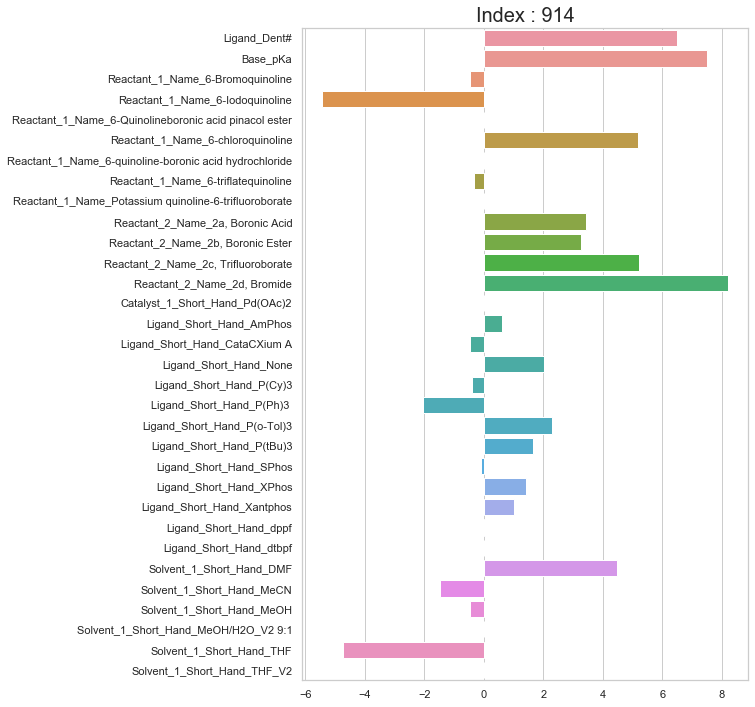

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 12))
title = 'Index : 914'
sns.barplot(data=contributions1.drop([1], axis=0),orient='h').set_title(title, fontsize = 20)
plt.show()

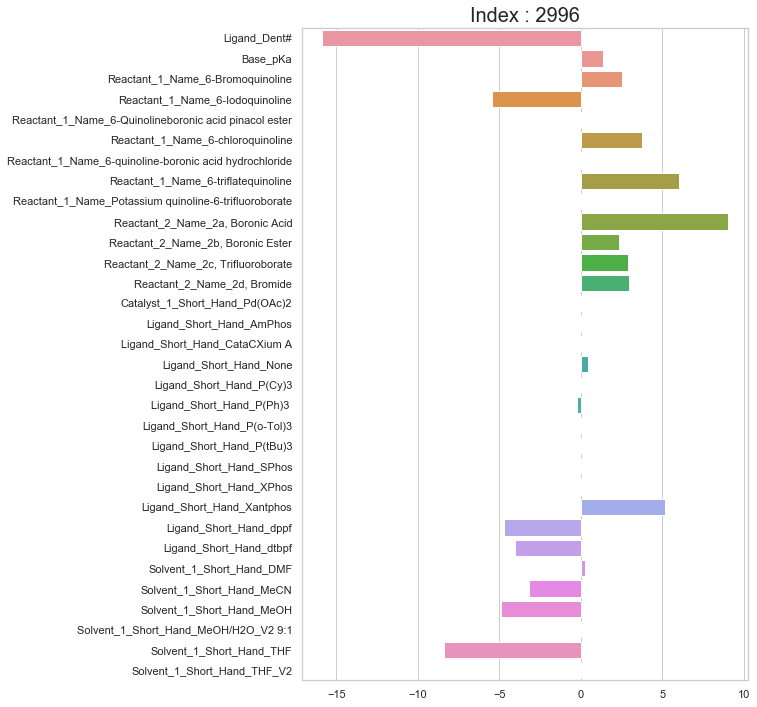

In [191]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 12))
title= 'Index : 2996'
sns.barplot(data=contributions1.drop([0], axis=0),orient='h').set_title(title, fontsize = 20)
plt.show()